In [81]:
# import pandas as pd
import numpy as np
from numpy import loadtxt
from numpy import sort
from xgboost import XGBClassifier, plot_importance
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.feature_selection import SelectFromModel

# Clean data based on our first input

# Set up Train and Test dataset

In [60]:
df = pd.read_csv('df_all.csv')

In [84]:
df.head()

,Player,Season,Pos,Age,Conf,Tm,G,GP%,GS,MP,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,ALL_STAR
0,Quincy Acy,2015-16,PF,25,West,SAC,59,0.719512,29,14.8,...,1.1,2.1,3.2,0.5,0.5,0.4,0.5,1.7,5.2,0
1,Jordan Adams,2015-16,SG,21,West,MEM,2,0.024390,0,7.5,...,0.0,1.0,1.0,1.5,1.5,0.0,1.0,1.0,3.5,0
2,Steven Adams,2015-16,C,22,West,OKC,80,0.975610,80,25.2,...,2.7,3.9,6.7,0.8,0.5,1.1,1.1,2.8,8.0,0
3,Arron Afflalo,2015-16,SG,30,East,NYK,71,0.865854,57,33.4,...,0.3,3.4,3.7,2.0,0.4,0.1,1.2,2.0,12.8,0
4,Alexis Ajinça,2015-16,C,27,West,NOP,59,0.719512,17,14.6,...,1.3,3.3,4.6,0.5,0.3,0.6,0.9,2.3,6.0,0


In [62]:
#Here we set total games in a season, 2019-20 was scraped with only 29 games played
TG = list(np.where(df['Season'] == '2019-20', 29, 82))
GP = df['G'] / TG
df.insert(7, 'GP%', GP)

In [63]:
df_train = df.loc[(df['Season'] == '2015-16') | (df['Season'] == '2016-17') | (df['Season'] == '2017-18')]

In [64]:
#train, test, eval
df_train = df.loc[(df['Season'] == '2015-16') | (df['Season'] == '2016-17') | (df['Season'] == '2017-18')]
df_test = df.loc[(df['Season'] == '2018-19')]

In [65]:
X_train =  df_train[['GP%', 'MP',
       'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%',
       'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV',
       'PF', 'PTS']]

Y_train = df_train['ALL_STAR']

In [66]:
X_test = df_test[['GP%', 'MP',
       'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%',
       'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV',
       'PF', 'PTS']]

Y_test = df_test['ALL_STAR']

[0.0, 0.0066583985, 0.015439738, 0.017084468, 0.018519603, 0.01879427, 0.019589309, 0.019875271, 0.019895362, 0.022224735, 0.023537032, 0.023595978, 0.026255695, 0.027751066, 0.031024745, 0.032287944, 0.03230372, 0.039001554, 0.03996031, 0.044022195, 0.064077325, 0.06686807, 0.12648562, 0.26474765]


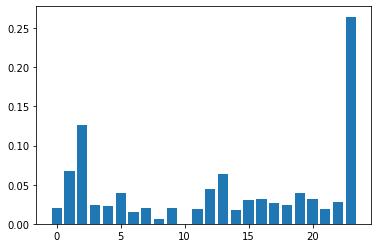

In [67]:
# fit model no training data
model = XGBClassifier()
model.fit(X_train, Y_train)

# feature importance
print(sorted(model.feature_importances_))

# plot
pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
pyplot.show()


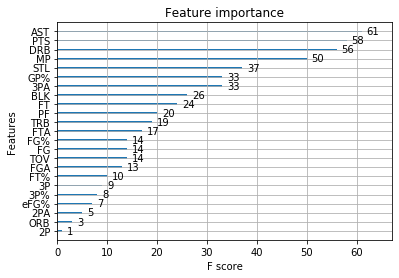

In [68]:
plot_importance(model)
pyplot.show()

#to my surprise that DRB is considered a important trait for an All Star

In [69]:
#fit model 
model = XGBClassifier()
model.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [70]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(Y_test, predictions, normalize=True)

thresholds = sort(model.feature_importances_)

In [71]:
#this is not a good measure of our model
accuracy

0.981638418079096

In [72]:
df_test['y_pred'] = predictions

C:\Users\leo.tsang\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [73]:
df_pred = df_test.loc[(df_test['y_pred'] == 1) | (df_test['ALL_STAR'] == 1)]
df_pred

,Player,Season,Pos,Age,Conf,Tm,G,GP%,GS,MP,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,ALL_STAR,y_pred
1844,LaMarcus Aldridge,2018-19,C,33,West,SAS,81,0.987805,81,33.2,...,6.1,9.2,2.4,0.5,1.3,1.8,2.2,21.3,1,1
1856,Giannis Antetokounmpo,2018-19,PF,24,East,MIL,72,0.878049,72,32.8,...,10.3,12.5,5.9,1.3,1.5,3.7,3.2,27.7,1,1
1884,Bradley Beal,2018-19,SG,25,East,WAS,82,1.000000,82,36.9,...,3.9,5.0,5.5,1.5,0.7,2.7,2.8,25.6,1,1
1939,Jimmy Butler,2018-19,SF-SG,29,West,TOT,65,0.792683,65,33.6,...,3.4,5.3,4.0,1.9,0.6,1.5,1.7,18.7,0,1
1940,Jimmy Butler,2018-19,SG,29,West,MIN,10,0.121951,10,36.1,...,3.6,5.2,4.3,2.4,1.0,1.4,1.8,21.3,0,1
1996,Stephen Curry,2018-19,PG,30,West,GSW,69,0.841463,69,33.8,...,4.7,5.3,5.2,1.3,0.4,2.8,2.4,27.3,1,1
1998,Anthony Davis,2018-19,C,25,West,NOP,56,0.682927,56,33.0,...,8.9,12.0,3.9,1.6,2.4,2.0,2.4,25.9,1,1
2011,DeMar DeRozan,2018-19,SG,29,West,SAS,77,0.939024,77,34.9,...,5.3,6.0,6.2,1.1,0.5,2.6,2.3,21.2,0,1
2018,Luka Dončić,2018-19,SG,19,West,DAL,72,0.878049,72,32.2,...,6.6,7.8,6.0,1.1,0.3,3.4,1.9,21.2,0,1
2025,Andre Drummond,2018-19,C,25,East,DET,79,0.963415,79,33.5,...,10.2,15.6,1.4,1.7,1.7,2.2,3.4,17.3,0,1


In [74]:
Recall = recall_score(Y_test, predictions)
Precision = precision_score(Y_test, predictions)

Recall, Precision

(0.8076923076923077, 0.7241379310344828)

In [75]:
df_pred[['Player','ALL_STAR','y_pred']]

,Player,ALL_STAR,y_pred
1844,LaMarcus Aldridge,1,1
1856,Giannis Antetokounmpo,1,1
1884,Bradley Beal,1,1
1939,Jimmy Butler,0,1
1940,Jimmy Butler,0,1
1996,Stephen Curry,1,1
1998,Anthony Davis,1,1
2011,DeMar DeRozan,0,1
2018,Luka Dončić,0,1
2025,Andre Drummond,0,1


# Predicting the 2019/20 All Stars

In [76]:
df_eval = df.loc[(df['Season'] == '2019-20')]
eval_X = df_eval[['GP%', 'MP',
       'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%',
       'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV',
       'PF', 'PTS']]

In [77]:
eval_pred = model.predict(eval_X)
eval_predictions = [round(value) for value in eval_pred]

In [78]:
df_eval['y_pred'] = eval_predictions

C:\Users\leo.tsang\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [88]:
df_eval = df_eval.loc[(df_eval['y_pred'] == 1)]

In [91]:
df_eval.sort_values(by=['Conf'])

,Player,Season,Pos,Age,Conf,Tm,G,GP%,GS,MP,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,ALL_STAR,y_pred
2555,Giannis Antetokounmpo,2019-20,PF,25,East,MIL,26,0.896552,26,31.1,...,10.2,12.8,5.3,1.3,1.2,3.7,3.2,31.0,0,1
2981,Kemba Walker,2019-20,PG,29,East,BOS,23,0.793103,23,32.3,...,3.3,4.2,5.3,1.0,0.6,2.1,1.7,23.1,0,1
2945,Pascal Siakam,2019-20,PF,25,East,TOR,25,0.862069,25,36.8,...,6.8,8.3,3.6,1.0,0.9,2.7,2.8,24.7,0,1
2807,Zach LaVine,2019-20,SG,24,East,CHI,28,0.965517,28,32.7,...,3.7,4.5,3.9,1.3,0.5,3.3,2.4,22.6,0,1
2764,Kyrie Irving,2019-20,PG,27,East,BRK,11,0.379310,11,33.8,...,4.5,5.4,7.2,1.1,0.5,2.4,2.9,28.5,0,1
2710,Devonte' Graham,2019-20,PG,24,East,CHO,29,1.000000,19,34.1,...,2.8,3.8,7.4,0.8,0.3,3.1,1.8,19.6,0,1
3007,Trae Young,2019-20,PG,21,East,ATL,26,0.896552,26,34.9,...,3.7,4.2,8.5,1.2,0.1,4.9,1.5,27.8,0,1
2672,Andre Drummond,2019-20,C,26,East,DET,25,0.862069,25,33.8,...,12.0,16.6,2.9,1.7,1.8,3.6,3.8,17.7,0,1
2577,Bradley Beal,2019-20,SG,26,East,WAS,24,0.827586,24,36.8,...,3.6,4.8,6.9,1.0,0.3,3.6,2.8,27.5,0,1
2620,Jimmy Butler,2019-20,SF,30,East,MIA,22,0.758621,22,35.5,...,4.6,6.5,6.8,2.1,0.7,2.5,1.4,21.0,0,1


In [92]:
df_eval.to_csv('df_eval_pred')